In [5]:
import re
import numpy as np
import matplotlib.pyplot as plt
from math import log
from scipy.optimize import curve_fit

In [ ]:
from os import environ, path, remove
from elasticsearch import Elasticsearch
from elasticsearch.helpers import scan
from elasticsearch.exceptions import NotFoundError, TransportError

client = Elasticsearch(hosts=environ.get('bonsai_CAIM'))

In [29]:
def prepare_data(file):
    ydata = []
    with open(file) as cw_novels:
        lines = cw_novels.readlines()
        for line in lines:
            line = line.replace('\x00','').replace('\n', '')
            if re.search(r',', line):
                [count, word] = line.split(', ', maxsplit=1)
                if not re.search(r'\d|\.|_', word) and re.match(r'^[A-Za-z]+$', word):
                    ydata.insert(0, int(count))
    xdata = [x for x in range(1, len(ydata) + 1)]
    logX = [log(x) for x in xdata]
    logY = [log(y) for y in ydata]
    
    return xdata, ydata, logX, logY

def func_powerlaw(x, a, b, c):
    return c / (x + b) ** a

def fitting(xdata, ydata, func):
    popt, pcov = curve_fit(func, xdata, ydata, maxfev=2000, bounds=([-np.inf, .99, -np.inf], [np.inf, 1., np.inf]))
    return popt, pcov

def plot_data(xdata, ydata):
    plt.plot(xdata, ydata, 'ro', label='data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

## NOVELS

In [24]:
x_novels, y_novels, logX_novels, logY_novels = prepare_data("cwords_novels.txt")

In [30]:
popt_novels, pcov_novels = fitting(x_novels, y_novels, func_powerlaw)
print(popt_novels)
print(pcov_novels)

[1.03867520e+00 9.90000000e-01 4.09988448e+05]
[[6.08168844e-07 2.79570952e-06 7.31963964e-01]
 [2.79570952e-06 1.63355916e-05 3.84879033e+00]
 [7.31963964e-01 3.84879033e+00 9.66323331e+05]]


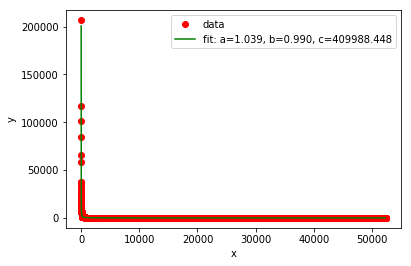

In [34]:
plot_data(x_novels, y_novels)
plt.plot(x_novels, func_powerlaw(x_novels, *popt_novels), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_novels))
plt.legend()

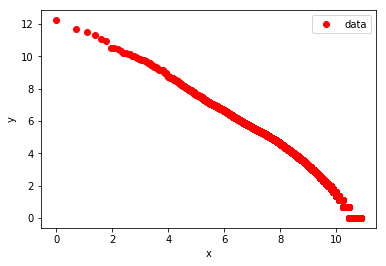

In [10]:
plot_data(logX_novels, logY_novels)

## NEWS

In [ ]:
x_news, y_news, logX_news, logY_news = prepare_data("cwords_news.txt")

In [ ]:
popt_news, pcov_news = fitting(x_news, y_news, func_powerlaw)
print(popt_news)
print(pcov_news)

In [ ]:
plot_data(x_news, y_news)
plt.plot(x_news, func_powerlaw(x_news, *popt_news), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_news))
plt.legend()

In [ ]:
plot_data(logX_news, logY_news)